# Boston

__Ch 03 - Q15 (applied)__  
This problem involves the Boston data set, which we saw in the lab for this chapter. 
We will now try to predict per capita crime rate using the other variables in this data set. 
In other words, per capita crime rate is the response, and the other variables are the predictors.

__Description__  
This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass.

__Source__  
The data was originally published by Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.

__References__  
This dataset is a part of the course material of the book : ___Introduction to Statistical Learning with R___

__Short description of variables__  

variable | description
:--- | :---
crim | per capita crime rate by town
zn | proportion of residential land zoned for lots over 25,000 sq.ft.
indus | proportion of non-retail business acres per town.
chas | Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).
nox | nitrogen oxides concentration (parts per 10 million).
rm | average number of rooms per dwelling.
age | proportion of owner-occupied units built prior to 1940.
dis | weighted mean of distances to five Boston employment centres.
rad | index of accessibility to radial highways.
tax | full-value property-tax rate per \$10,000.
ptratio | pupil-teacher ratio by town.
black | 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.
lstat | lower status of the population (percent).
medv | median value of owner-occupied homes in \$1000s.

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

<a id='index'></a>
### Index
- [1) Load packages](#1%29-Load-packages)  
- [2) Import data](#2%29-Import-data)
- [a) SLR with each predictor](#a%29-SLR-with-each-predictor)
    - [Models](#Models)
    - [Plots](#Plots)
- [b) Multiple Linear Regression](#b%29-Multiple-Linear-Regression)
    - [Model](#Model)
    - [Statistically insignificant predictors](#Statistically-insignificant-predictors)
    - [Statistically significant](#Statistically-significant)
- [c) Coefficient comparison - SLR vs MLR](#c%29-Coefficient-comparison---SLR-vs-MLR)
- [d) Non-linear association](#d%29-Non-linear-association)
    - [Cubic models](#Cubic-models)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 1) Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf


In [2]:
sns.set_style(rc={'figure.facecolor':'w'})

In [3]:
def insignificant_red(val):
    color = 'red' if val > 0.05 else None
    return 'color: %s' % color

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## 2) Import data

In [4]:
from sklearn.datasets import load_boston

In [5]:
boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df['medv'] = boston.target
df.columns = map(str.lower, df.columns)
df.rename(columns={'b':'black'}, inplace=True)

print(df.shape)
df.head()

(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
# Check for missing values
df.isna().any().any()

False

In [7]:
# Structure of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    float64
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    float64
 9   tax      506 non-null    float64
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


All of the columns are of a numerical natue and have been recongnized as such by Python. With that and no missing values, prima facie, the data appears to be complete.

[go to toc](#index)

<b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b>

## a) SLR with each predictor
For each predictor, fit a simple linear regression model to predict the response. Describe your results. In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions.

### Models

In [8]:
xvars = [x for x in df.columns if x not in ['crim']]

# A dataframe to store critical results
crim_slr_res = pd.DataFrame(columns=['rsq', 'coef', 'pvalue'], index=xvars)

# A dictionary to store the model results
crim_slr_models = {x:smf.ols(f'crim ~ {x}', data=df).fit() for x in xvars}

# Adding values to result dataframe
for model in crim_slr_models:
    crim_slr_res.loc[model] = [crim_slr_models[model].rsquared,
                               crim_slr_models[model].params[model], 
                               crim_slr_models[model].pvalues[model]]

In [9]:
crim_slr = crim_slr_res.astype('float').round(5)
crim_slr.sort_values(by='rsq', ascending=False)

,rsq,coef,pvalue
rad,0.39126,0.61791,0.00000
tax,0.33961,0.02974,0.00000
lstat,0.20759,0.54880,0.00000
nox,0.17722,31.24853,0.00000
indus,0.16531,0.50978,0.00000
medv,0.15078,-0.36316,0.00000
black,0.14827,-0.03628,0.00000
dis,0.14415,-1.55090,0.00000
age,0.12442,0.10779,0.00000
ptratio,0.08407,1.15198,0.00000


In [10]:
# p-value > 5%
crim_slr[crim_slr.pvalue > 0.05]

,rsq,coef,pvalue
chas,0.00312,-1.89278,0.20943


<div class="alert alert-block alert-info">
    crim has a statistically significant linear relationship (at $\alpha$ = 5%) with every predictor except chas.
</div>

### Plots

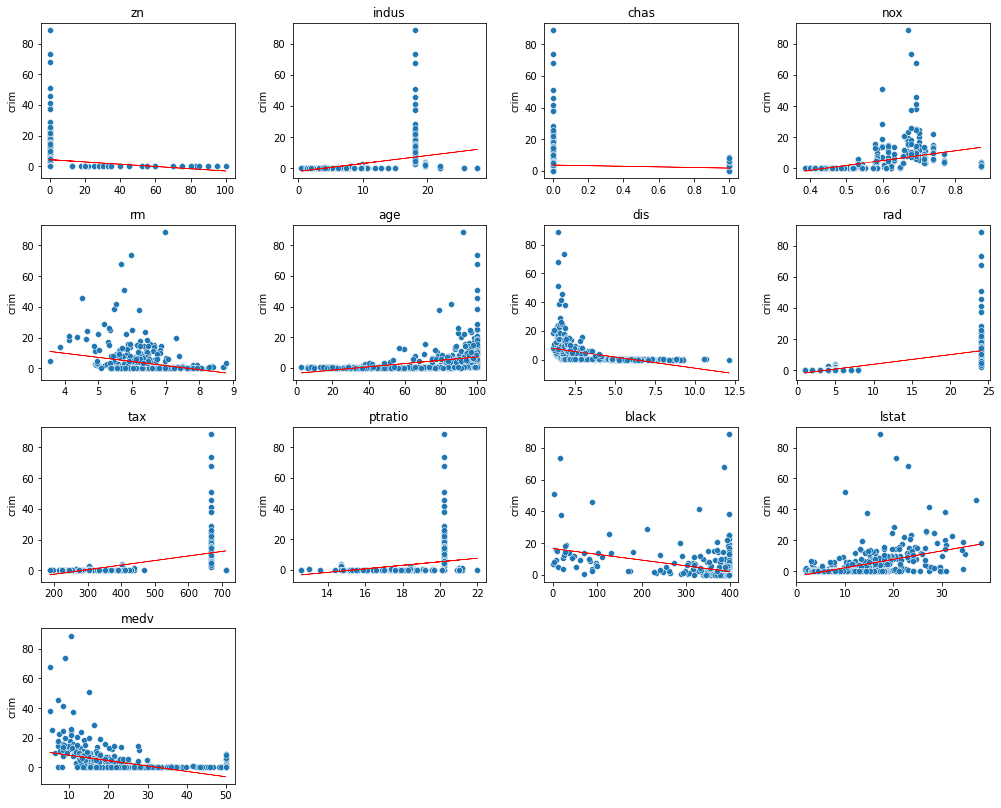

In [11]:
plt.figure(figsize=(17,14))
for i,x in enumerate(xvars):
    plt.subplot(4, 4, i+1)
    sns.scatterplot(x=x, y='crim', data=df)
    plt.plot(df[x], crim_slr_models[x].fittedvalues, lw=0.7, color='r')
    plt.title(x)
    plt.xlabel('')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## b) Multiple Linear Regression
Fit a multiple regression model to predict the response using all of the predictors. 
Describe your results. For which predictors can we reject the null hypothesis $H_0 : \beta_j = 0$ ?

In [12]:
formula_str = 'crim ~ ' + ' + '.join(xvars)
formula_str

'crim ~ zn + indus + chas + nox + rm + age + dis + rad + tax + ptratio + black + lstat + medv'

### Model

In [13]:
mreg1 = smf.ols(formula_str, data=df).fit()
mreg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   crim   R-squared:                       0.454
Model:                            OLS   Adj. R-squared:                  0.440
Method:                 Least Squares   F-statistic:                     31.47
Date:                Sun, 21 Mar 2021   Prob (F-statistic):           1.57e-56
Time:                        09:55:16   Log-Likelihood:                -1653.3
No. Observations:                 506   AIC:                             3335.
Df Residuals:                     492   BIC:                             3394.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.0332      7.235      2.354      0.019       2.818      31.248
zn             0.0449      0.019      2.394      0.017       0.008       0.082
indus         -0.0639      0.083     -0.766      0.444      -0.228       0.100
chas          -0.7491      1.180     -0.635      0.526      -3.068       1.570
nox          -10.3135      5.276     -1.955      0.051     -20.679       0.052
rm             0.4301      0.613      0.702      0.483      -0.774       1.634
age            0.0015      0.018      0.081      0.935      -0.034       0.037
dis           -0.9872      0.282     -3.503      0.001      -1.541      -0.433
rad            0.5882      0.088      6.680      0.000       0.415       0.761
tax           -0.0038      0.005     -0.733      0.464      -0.014       0.006
ptratio       -0.2711      0.186     -1.454      0.147      -0.637       0.095
black         -0.0075      0.004     -2.052      0.041      -0.015      -0.000
lstat          0.1262      0.076      1.667      0.096      -0.023       0.275
medv          -0.1989      0.061     -3.287      0.001      -0.318      -0.080
==============================================================================
Omnibus:                      666.613   Durbin-Watson:                   1.519
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            84887.625
Skew:                           6.617   Prob(JB):                         0.00
Kurtosis:                      65.058   Cond. No.                     1.58e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Statistically insignificant predictors

In [14]:
# Statistically insignificant predictors
pd.concat([mreg1.params[mreg1.pvalues > 0.05], mreg1.pvalues[mreg1.pvalues > 0.05]], axis=1,
         keys=['coef','pvalue']).round(4)

,coef,pvalue
indus,-0.0639,0.4443
chas,-0.7491,0.5259
nox,-10.3135,0.0512
rm,0.4301,0.4831
age,0.0015,0.9355
tax,-0.0038,0.4638
ptratio,-0.2711,0.1466
lstat,0.1262,0.0962


We can reject the &ensp; $H_0 : \beta_j = 0$ at $\alpha = 0.05$ &ensp; for the above predictors.

### Statistically significant

In [15]:
# Statistically significant predictors
pd.concat([mreg1.params[mreg1.pvalues < 0.05], mreg1.pvalues[mreg1.pvalues < 0.05]], axis=1,
         keys=['coef','pvalue']).round(4)

,coef,pvalue
Intercept,17.0332,0.0189
zn,0.0449,0.0170
dis,-0.9872,0.0005
rad,0.5882,0.0000
black,-0.0075,0.0407
medv,-0.1989,0.0011


[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## c) Coefficient comparison - SLR vs MLR
How do your results from (a) compare to your results from (b)? 
Create a plot displaying the univariate regression coefficients from (a) on the x-axis, and the multiple regression coefficients from (b) on the y-axis. 
That is, each predictor is displayed as a single point in the plot. 
Its coefficient in a simple linear regression model is shown on the x-axis, and its coefficient estimate in the multiple linear regression model is shown on the y-axis.

,slr,mlr,diff
zn,-0.0739,0.0449,0.1188
indus,0.5098,-0.0639,-0.5736
chas,-1.8928,-0.7491,1.1436
nox,31.2485,-10.3135,-41.5621
rm,-2.6840,0.4301,3.1142
age,0.1078,0.0015,-0.1063
dis,-1.5509,-0.9872,0.5637
rad,0.6179,0.5882,-0.0297
tax,0.0297,-0.0038,-0.0335
ptratio,1.1520,-0.2711,-1.4231


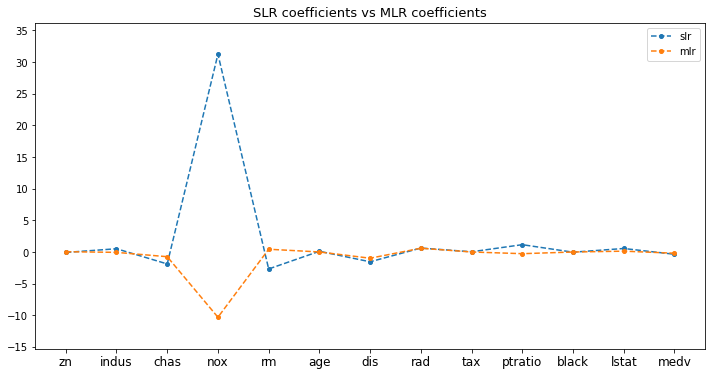

In [16]:
# Coefficients
coefs = pd.concat([crim_slr['coef'], mreg1.params[1:]], axis=1, keys=['slr','mlr'])
coefs['diff'] = coefs.iloc[:,1] - coefs.iloc[:,0]
display(coefs.round(4))

ax = coefs.iloc[:,:-1].plot(marker='o', markersize=4, linestyle='--', figsize=(12,6))
ax.set_xticks(range(len(xvars)))
ax.set_xticklabels(xvars, fontsize=12)
ax.margins(y=0.12)
ax.set_yticks(range(round(ax.get_ylim()[0]), round(ax.get_ylim()[1]), 5))
ax.set_title('SLR coefficients vs MLR coefficients', fontsize=13);

### Plot

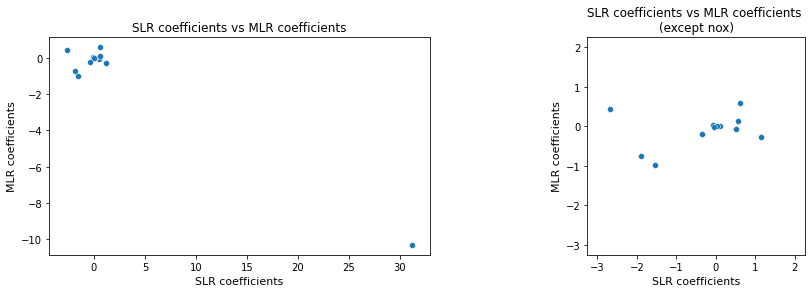

In [17]:
plt.figure(figsize=(15,4))

# Coefficient scatterplot
plt.subplot(121)
sns.scatterplot(x=coefs.slr, y=coefs.mlr).set_title('SLR coefficients vs MLR coefficients',fontsize=12)
plt.xlabel('SLR coefficients', fontsize=11);
plt.ylabel('MLR coefficients', fontsize=11);

# Coefficient scatterplot after removing nox
plt.subplot(122)
plt.gca().set_aspect('equal', adjustable='box')
sns.scatterplot(x=coefs.slr.drop('nox'), y=coefs.mlr.drop('nox'))
plt.plot([-3,2], [-3,2], lw=0)
plt.title('SLR coefficients vs MLR coefficients \n(except nox)',fontsize=12)
plt.xlabel('SLR coefficients', fontsize=11)
plt.ylabel('MLR coefficients', fontsize=11);

[go to toc](#index)

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

## d) Non-linear association
Is there evidence of non-linear association between any of the predictors and the response? To answer this question, for each predictor X, fit a model of the form &ensp; 
$Y = \beta_0 + \beta_1X + \beta_2X^2 + \beta_3X^3 + \epsilon$

### Cubic models

In [18]:
# A dataframe to store critical results
crim_plr_res = pd.DataFrame(columns=['rsq', 'x_coef', 'x2_coef', 'x3_coef', 
                                     'x_pval', 'x2_pval',  'x3_pval'], index=xvars)

# A dictionary to store the model results
crim_plr_models = {x:smf.ols(f'crim ~ {x} + np.square({x}) + np.power({x}, 3)', data=df).fit() 
                   for x in xvars}

# Adding values to result dataframe
for model in crim_plr_models:
    crim_plr_res.loc[model] = [crim_plr_models[model].rsquared,
                               crim_plr_models[model].params[1], crim_plr_models[model].params[2],
                               crim_plr_models[model].params[3], crim_plr_models[model].pvalues[1], 
                               crim_plr_models[model].pvalues[2], crim_plr_models[model].pvalues[3]]

In [19]:
crim_plr = crim_plr_res.astype('float').round(4)
crim_plr['relationship'] = crim_plr.apply(lambda x: 'cubic' if x.loc['x3_pval'] < 0.05 else \
                                 'quad' if x.loc['x2_pval'] < 0.05 else \
                                 'linear' if x.loc['x_pval'] < 0.05 else '-', axis=1)
crim_plr

,rsq,x_coef,x2_coef,x3_coef,x_pval,x2_pval,x3_pval,relationship
zn,0.0582,-0.3322,0.0065,-0.0000,0.0026,0.0938,0.2295,linear
indus,0.2597,-1.9652,0.2519,-0.0070,0.0001,0.0000,0.0000,cubic
chas,0.0031,-0.6309,-0.6309,-0.6309,0.2094,0.2094,0.2094,-
nox,0.2970,-1279.3713,2248.5441,-1245.7029,0.0000,0.0000,0.0000,cubic
rm,0.0678,-39.1501,4.5509,-0.1745,0.2118,0.3641,0.5086,-
age,0.1742,0.2737,-0.0072,0.0001,0.1427,0.0474,0.0067,cubic
dis,0.2778,-15.5544,2.4521,-0.1186,0.0000,0.0000,0.0000,cubic
rad,0.4000,0.5127,-0.0752,0.0032,0.6234,0.6130,0.4823,-
tax,0.3689,-0.1533,0.0004,-0.0000,0.1097,0.1375,0.2439,-
ptratio,0.1138,-82.3605,4.6353,-0.0848,0.0030,0.0041,0.0063,cubic


### Statistically significant

In [20]:
# Statistically significant predictors
crim_plr_sig = crim_plr[crim_plr.relationship != '-']
crim_plr_sig

,rsq,x_coef,x2_coef,x3_coef,x_pval,x2_pval,x3_pval,relationship
zn,0.0582,-0.3322,0.0065,-0.0000,0.0026,0.0938,0.2295,linear
indus,0.2597,-1.9652,0.2519,-0.0070,0.0001,0.0000,0.0000,cubic
nox,0.2970,-1279.3713,2248.5441,-1245.7029,0.0000,0.0000,0.0000,cubic
age,0.1742,0.2737,-0.0072,0.0001,0.1427,0.0474,0.0067,cubic
dis,0.2778,-15.5544,2.4521,-0.1186,0.0000,0.0000,0.0000,cubic
ptratio,0.1138,-82.3605,4.6353,-0.0848,0.0030,0.0041,0.0063,cubic
medv,0.4202,-5.0948,0.1555,-0.0015,0.0000,0.0000,0.0000,cubic


<div class="alert alert-block alert-info">
    Of the variables with a significant coefficient, zn has a linear relationship and the rest have a cubic relationship with crim.
</div>

### Plots

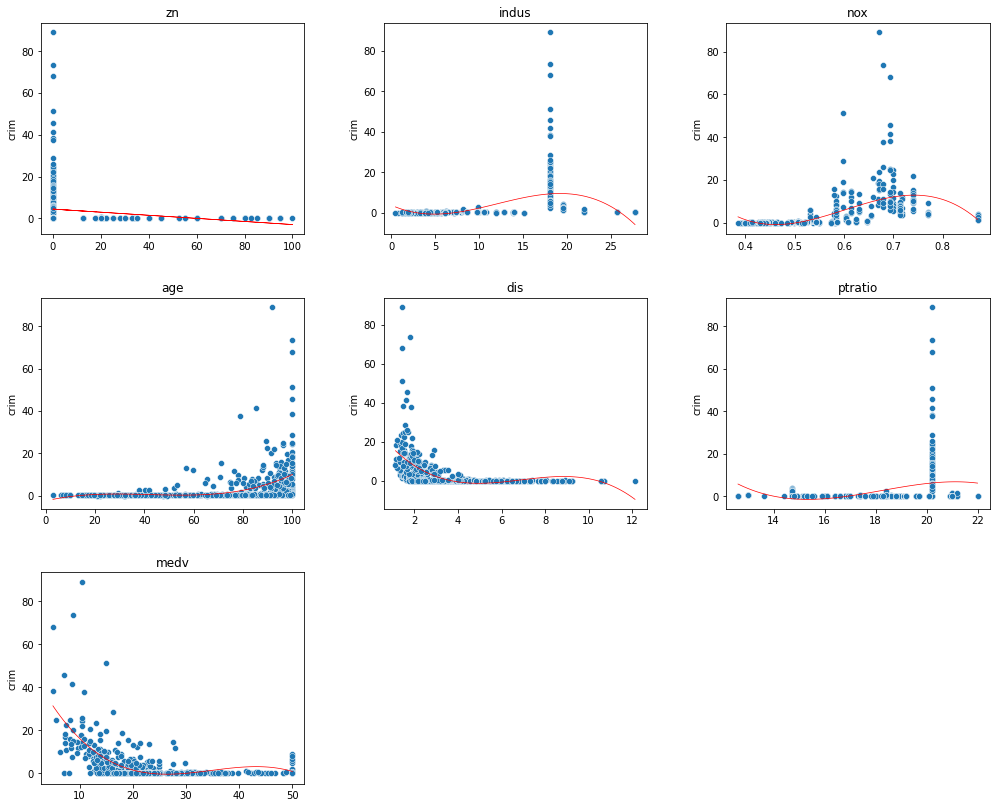

In [21]:
plt.figure(figsize=(17,14))
for i,x in enumerate(crim_plr_sig.index):
    plt.subplot(3, 3, i+1)
    sns.scatterplot(x=x, y='crim', data=df)
    if crim_plr_sig.loc[x, 'relationship'] == 'linear':
        plt.plot(df[x], crim_slr_models[x].fittedvalues, lw=0.7, color='r')
    elif crim_plr_sig.loc[x, 'relationship'] == 'cubic':
        xcoord = np.linspace(min(df[x]), max(df[x]), 100)
        ycoord = crim_plr_models[x].params[0] + xcoord*crim_plr_models[x].params[1] + \
        (xcoord**2)*crim_plr_models[x].params[2] + (xcoord**3)*crim_plr_models[x].params[3]
        plt.plot(xcoord, ycoord, lw=0.7, color='r')
    plt.title(x)
    plt.xlabel('')
plt.subplots_adjust(hspace=0.3, wspace=0.3)

<div class="alert alert-block alert-info">
    medv's and nox's relationship with crim seems to have a very nice fit with their respictive cubic regression model lines.<br>
    age and dis also have a good cubic fit with crim.
</div>

<div align="center"><b>------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------</b></div>

### References

https://www.kaggle.com/lmorgan95/islr-linear-regression-ch-3-solutions  
https://botlnec.github.io/islp/sols/chapter3/exercise11/

[go to toc](#index)

<div align="center"><b>-------------------------------------------- &ensp; <i>That's All Folks!</i> &ensp; --------------------------------------------</b></div>